# AI Tinkerers Demo: Large Scale AI/ML Inference with GPUs

## Pre-requisite: Light Benchmarking

Batch size: 1, Duration: 22.52 seconds; 255.23 sentences per second
Batch size: 2, Duration: 12.97 seconds; 443.20 sentences per second
Batch size: 4, Duration: 6.73 seconds; 854.22 sentences per second
Batch size: 8, Duration: 3.49 seconds; 1646.37 sentences per second
Batch size: 16, Duration: 1.91 seconds; 3004.88 sentences per second
Batch size: 32, Duration: 1.40 seconds; 4096.07 sentences per second
Batch size: 64, Duration: 1.06 seconds; 5442.69 sentences per second
Batch size: 128, Duration: 1.04 seconds; 5513.69 sentences per second
Batch size: 256, Duration: 1.07 seconds; 5381.07 sentences per second
Batch size: 512, Duration: 1.16 seconds; 4969.14 sentences per second
Batch size: 1024, Duration: 1.33 seconds; 4320.86 sentences per second
Batch size: 2048, Duration: 1.72 seconds; 3345.05 sentences per second
Batch size: 4096, Duration: 2.65 seconds; 2168.16 sentences per second


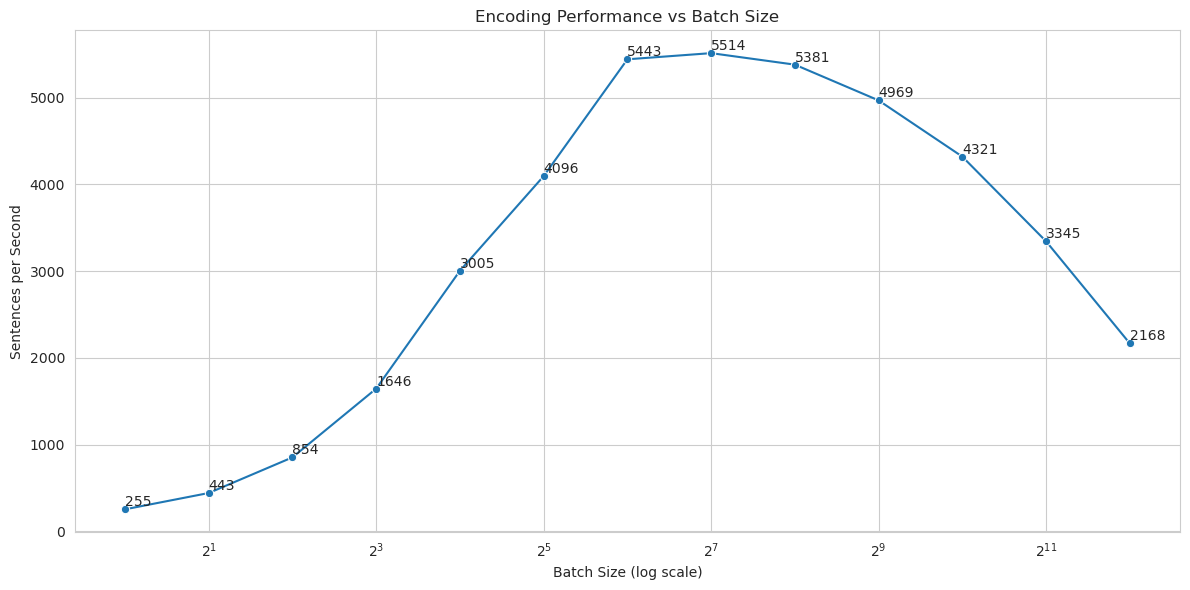

In [6]:
import time
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset and model
sentences = load_dataset("mteb/stsbenchmark-sts", split="train")["sentence1"]
embedder = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Prepare data structures
batch_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
durations = []
sentences_per_second = []

# Run the encoding for each batch size
for batch_size in batch_sizes:
    start_t = time.time()
    embedder.encode(sentences, batch_size=batch_size)
    duration = time.time() - start_t
    durations.append(duration)
    sentences_per_second.append(len(sentences) / duration)
    print(f"Batch size: {batch_size}, Duration: {duration:.2f} seconds; {len(sentences) / duration:.2f} sentences per second")

# Create a DataFrame
df = pd.DataFrame({
    'Batch Size': batch_sizes,
    'Duration (s)': durations,
    'Sentences per Second': sentences_per_second
})

# Set up the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the line plot
sns.lineplot(data=df, x='Batch Size', y='Sentences per Second', marker='o')

# Set the x-axis to log scale
plt.xscale('log', base=2)

# Customize the plot
plt.title('Encoding Performance vs Batch Size')
plt.xlabel('Batch Size (log scale)')
plt.ylabel('Sentences per Second')

# Add value labels
for i, v in enumerate(sentences_per_second):
    plt.text(batch_sizes[i], v, f'{v:.0f}', ha='left', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

Loading dataset and model...
Running benchmarks...
Batch size:    1, Duration: 3.82s, Throughput: 261.84 sentences/s
Batch size:    2, Duration: 2.19s, Throughput: 456.06 sentences/s
Batch size:    4, Duration: 1.16s, Throughput: 860.83 sentences/s
Batch size:    8, Duration: 0.60s, Throughput: 1671.57 sentences/s
Batch size:   16, Duration: 0.32s, Throughput: 3077.53 sentences/s
Batch size:   32, Duration: 0.18s, Throughput: 5486.52 sentences/s
Batch size:   64, Duration: 0.13s, Throughput: 7750.69 sentences/s
Batch size:  128, Duration: 0.13s, Throughput: 7611.32 sentences/s
Batch size:  256, Duration: 0.14s, Throughput: 6952.20 sentences/s
Batch size:  512, Duration: 0.16s, Throughput: 6279.04 sentences/s
Batch size: 1024, Duration: 0.22s, Throughput: 4630.15 sentences/s
Batch size: 2048, Duration: 0.21s, Throughput: 4691.13 sentences/s
Batch size: 4096, Duration: 0.21s, Throughput: 4670.65 sentences/s


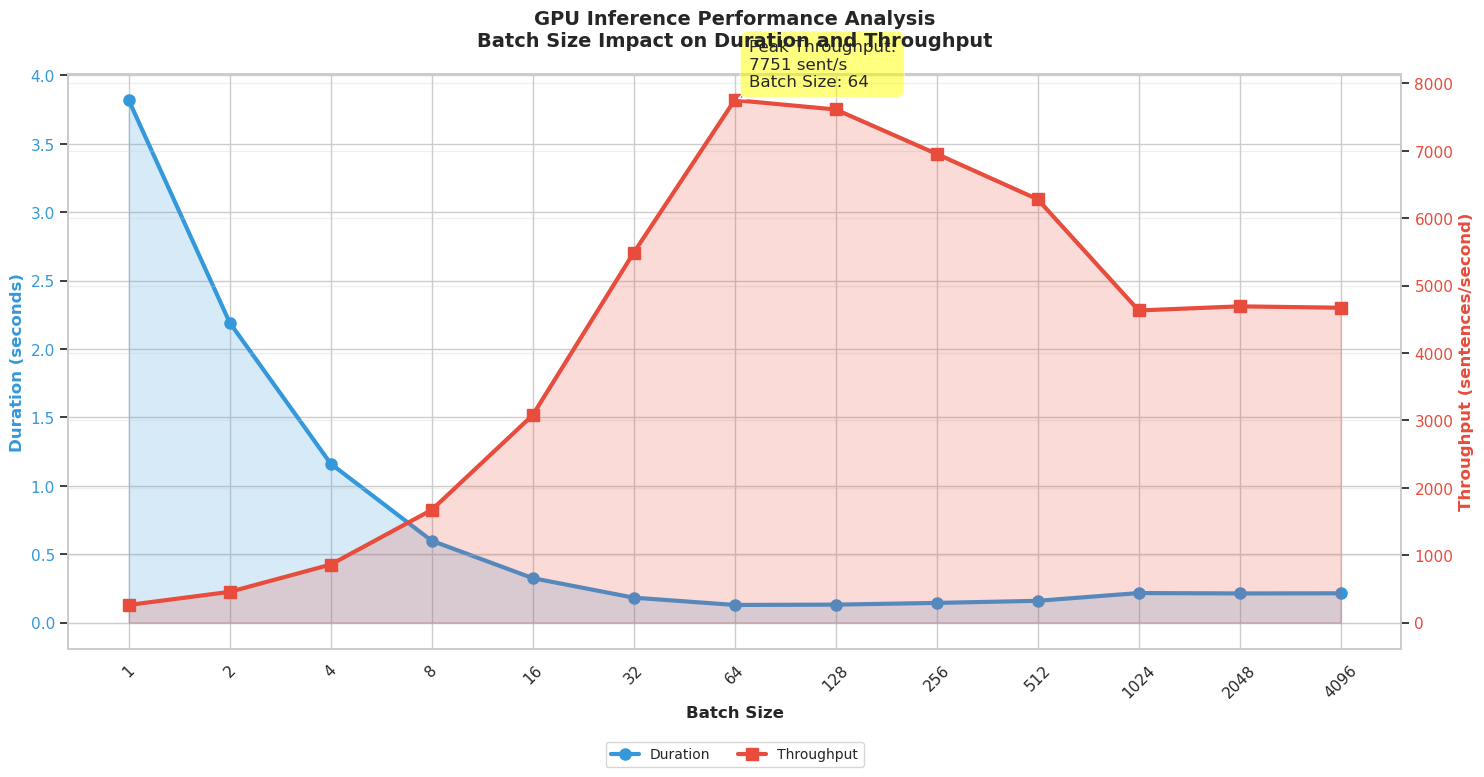


Detailed Performance Metrics:
|   Batch Size |   Duration (s) |   Throughput (sentences/s) |
|-------------:|---------------:|---------------------------:|
|         1.00 |           3.82 |                     261.84 |
|         2.00 |           2.19 |                     456.06 |
|         4.00 |           1.16 |                     860.83 |
|         8.00 |           0.60 |                    1671.57 |
|        16.00 |           0.32 |                    3077.53 |
|        32.00 |           0.18 |                    5486.52 |
|        64.00 |           0.13 |                    7750.69 |
|       128.00 |           0.13 |                    7611.32 |
|       256.00 |           0.14 |                    6952.20 |
|       512.00 |           0.16 |                    6279.04 |
|      1024.00 |           0.22 |                    4630.15 |
|      2048.00 |           0.21 |                    4691.13 |
|      4096.00 |           0.21 |                    4670.65 |


In [7]:
import time
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Load the dataset and model
print("Loading dataset and model...")
sentences = load_dataset("mteb/stsbenchmark-sts", split="train")["sentence1"]
embedder = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Prepare data structures
batch_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
durations = []
sentences_per_second = []

# Run the encoding for each batch size
print("Running benchmarks...")
for batch_size in batch_sizes:
    start_t = time.time()
    embedder.encode(sentences[:1000], batch_size=batch_size)  # Using first 1000 sentences for faster demo
    duration = time.time() - start_t
    durations.append(duration)
    sentences_per_second.append(1000 / duration)  # Using actual number of sentences
    print(f"Batch size: {batch_size:4d}, Duration: {duration:.2f}s, Throughput: {1000 / duration:.2f} sentences/s")

# Create a DataFrame
df = pd.DataFrame({
    'Batch Size': batch_sizes,
    'Duration (s)': durations,
    'Throughput (sentences/s)': sentences_per_second
})

# Create the visualization
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot duration on primary y-axis
color1 = '#3498db'  # Blue
ax1.set_xlabel('Batch Size', fontsize=12, fontweight='bold')
ax1.set_ylabel('Duration (seconds)', color=color1, fontsize=12, fontweight='bold')
line1 = ax1.plot(df['Batch Size'], df['Duration (s)'], color=color1, marker='o', linewidth=3, 
                 label='Duration', markersize=8)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.fill_between(df['Batch Size'], df['Duration (s)'], alpha=0.2, color=color1)

# Create secondary y-axis for throughput
ax2 = ax1.twinx()
color2 = '#e74c3c'  # Red
ax2.set_ylabel('Throughput (sentences/second)', color=color2, fontsize=12, fontweight='bold')
line2 = ax2.plot(df['Batch Size'], df['Throughput (sentences/s)'], color=color2, marker='s', 
                 linewidth=3, label='Throughput', markersize=8)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.fill_between(df['Batch Size'], df['Throughput (sentences/s)'], alpha=0.2, color=color2)

# Set x-axis to log scale
ax1.set_xscale('log', base=2)
ax1.set_xticks(batch_sizes)
ax1.set_xticklabels(batch_sizes, rotation=45)

# Add title
plt.title('GPU Inference Performance Analysis\nBatch Size Impact on Duration and Throughput', 
          fontsize=14, fontweight='bold', pad=20)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=2, fontsize=10)

# Add annotations for optimal points
best_throughput_idx = np.argmax(sentences_per_second)
ax2.annotate(f'Peak Throughput:\n{sentences_per_second[best_throughput_idx]:.0f} sent/s\nBatch Size: {batch_sizes[best_throughput_idx]}',
             xy=(batch_sizes[best_throughput_idx], sentences_per_second[best_throughput_idx]),
             xytext=(10, 10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Add grid and adjust layout
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

# Display the data in a formatted table
print("\nDetailed Performance Metrics:")
print(df.to_markdown(index=False, floatfmt=".2f"))

## 1. Load API Key with .env

In [1]:
from dotenv import load_dotenv

# Your .env file should contain PINECONE_API_KEY=abc
load_dotenv()

True

## 3. Prepare language model for vector encoder

We use a small transformers language model to create 364-dimensional embeddings. You can out models for generating embeddings

In [2]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = embedder.encode("Example sentences.")
dimension = embeddings.shape[0]

## 5. Generate vector values from wikipedia text

We retrieve a wikipedia based dataset with Hugging Face's datasets library. Note that this dataset contains Cohere's vectors, but we're generating our own in this notebook.

In [3]:
from datasets import load_dataset
import numpy as np
from sentence_transformers import SentenceTransformer
from tqdm.auto import tqdm
import torch
from dataclasses import dataclass
from typing import List, Dict, Any
import time

@dataclass
class Document:
    id: str
    content: str
    metadata: Dict[str, Any]
    embedding: np.ndarray = None

class InMemoryRetriever:
    def __init__(self, model_name: str = 'sentence-transformers/all-MiniLM-L6-v2', batch_size: int = 64):
        self.embedder = SentenceTransformer(model_name)
        self.batch_size = batch_size
        self.documents: List[Document] = []
        self.embeddings = None
        
    def add_documents(self, documents: List[Document], show_progress: bool = True):
        """Add documents and compute their embeddings efficiently in batches"""
        self.documents.extend(documents)
        
        # Prepare content for embedding
        texts = [doc.content for doc in documents]
        
        # Compute embeddings in batches with progress bar
        embeddings = []
        for i in tqdm(range(0, len(texts), self.batch_size), disable=not show_progress):
            batch = texts[i:i + self.batch_size]
            batch_embeddings = self.embedder.encode(batch)
            embeddings.extend(batch_embeddings)
        
        # Store embeddings in documents and update main embedding matrix
        embeddings = np.array(embeddings)
        for doc, emb in zip(documents, embeddings):
            doc.embedding = emb
            
        # Update or initialize the main embedding matrix
        if self.embeddings is None:
            self.embeddings = embeddings
        else:
            self.embeddings = np.vstack([self.embeddings, embeddings])
    
    def search(self, query: str, top_k: int = 3) -> List[Document]:
        """Search for most similar documents using cosine similarity"""
        # Encode query
        query_embedding = self.embedder.encode(query)
        
        # Compute cosine similarity
        similarities = np.dot(self.embeddings, query_embedding) / (
            np.linalg.norm(self.embeddings, axis=1) * np.linalg.norm(query_embedding)
        )
        
        # Get top k indices
        top_indices = np.argsort(similarities)[-top_k:][::-1]
        
        # Return top k documents with scores
        results = []
        for idx in top_indices:
            doc = self.documents[idx]
            score = similarities[idx]
            results.append((doc, score))
            
        return results

# Initialize retriever
retriever = InMemoryRetriever()

# Load and prepare some Wikipedia documents
print("Loading Wikipedia dataset...")
max_docs = 1000  # Adjust based on your memory constraints
wiki_data = load_dataset("Cohere/wikipedia-22-12-simple-embeddings", split="train")

# Convert to Document objects
documents = []
for i, doc in enumerate(wiki_data):
    if i >= max_docs:
        break
    documents.append(Document(
        id=str(doc["id"]),
        content=doc["title"] + " " + doc["text"],
        metadata={
            "title": doc["title"],
            "url": doc["url"]
        }
    ))

# Add documents to retriever
print("\nComputing embeddings...")
retriever.add_documents(documents)

# Test the retriever
print("\nTesting retriever...")
query = "What is the theory of relativity?"
results = retriever.search(query, top_k=3)

print(f"\nTop 3 results for query: '{query}'")
print("-" * 80)
for doc, score in results:
    print(f"Score: {score:.4f}")
    print(f"Title: {doc.metadata['title']}")
    print(f"URL: {doc.metadata['url']}")
    print("-" * 80)

Loading Wikipedia dataset...

Computing embeddings...


  0%|          | 0/16 [00:00<?, ?it/s]


Testing retriever...

Top 3 results for query: 'What is the theory of relativity?'
--------------------------------------------------------------------------------
Score: 0.3250
Title: Solar System
URL: https://simple.wikipedia.org/wiki?curid=800
--------------------------------------------------------------------------------
Score: 0.3122
Title: Solar System
URL: https://simple.wikipedia.org/wiki?curid=800
--------------------------------------------------------------------------------
Score: 0.2989
Title: Schrödinger's cat
URL: https://simple.wikipedia.org/wiki?curid=43222
--------------------------------------------------------------------------------


In [4]:
class EnhancedInMemoryRetriever(InMemoryRetriever):
    def __init__(self, model_name: str = 'sentence-transformers/all-MiniLM-L6-v2', 
                 batch_size: int = 64,
                 device: str = None):
        super().__init__(model_name, batch_size)
        self.device = device or ('cuda' if torch.cuda.is_available() else 'cpu')
        self.embedder.to(self.device)
        
    def add_documents(self, documents: List[Document], show_progress: bool = True):
        """Enhanced version with better memory management and GPU support"""
        start_time = time.time()
        self.documents.extend(documents)
        
        # Prepare content for embedding
        texts = [doc.content for doc in documents]
        
        # Compute embeddings in batches with progress bar
        embeddings = []
        with torch.no_grad():  # Disable gradient computation for inference
            for i in tqdm(range(0, len(texts), self.batch_size), disable=not show_progress):
                batch = texts[i:i + self.batch_size]
                batch_embeddings = self.embedder.encode(
                    batch,
                    convert_to_tensor=True,
                    device=self.device
                )
                embeddings.extend(batch_embeddings.cpu().numpy())
        
        # Convert to numpy array and normalize
        embeddings = np.array(embeddings)
        embeddings = embeddings / np.linalg.norm(embeddings, axis=1)[:, np.newaxis]
        
        # Store embeddings and update main embedding matrix
        for doc, emb in zip(documents, embeddings):
            doc.embedding = emb
            
        if self.embeddings is None:
            self.embeddings = embeddings
        else:
            self.embeddings = np.vstack([self.embeddings, embeddings])
        
        duration = time.time() - start_time
        print(f"\nProcessed {len(documents)} documents in {duration:.2f} seconds")
        print(f"Average time per document: {(duration/len(documents))*1000:.2f} ms")
        
    def search(self, query: str, top_k: int = 3, threshold: float = None) -> List[Document]:
        """Enhanced search with threshold filtering and better performance"""
        # Encode and normalize query
        with torch.no_grad():
            query_embedding = self.embedder.encode(
                query,
                convert_to_tensor=True,
                device=self.device
            ).cpu().numpy()
        query_embedding = query_embedding / np.linalg.norm(query_embedding)
        
        # Compute cosine similarity (faster with normalized vectors)
        similarities = np.dot(self.embeddings, query_embedding)
        
        # Filter by threshold if specified
        if threshold is not None:
            mask = similarities >= threshold
            if not np.any(mask):
                return []
            top_indices = np.argsort(similarities[mask])[-top_k:][::-1]
            top_indices = np.where(mask)[0][top_indices]
        else:
            top_indices = np.argsort(similarities)[-top_k:][::-1]
        
        # Return top k documents with scores
        results = []
        for idx in top_indices:
            doc = self.documents[idx]
            score = similarities[idx]
            results.append((doc, score))
            
        return results
    
    def search_batch(self, queries: List[str], top_k: int = 3, threshold: float = None) -> List[List[Document]]:
        """Batch search for multiple queries"""
        # Encode all queries at once
        with torch.no_grad():
            query_embeddings = self.embedder.encode(
                queries,
                convert_to_tensor=True,
                device=self.device
            ).cpu().numpy()
        
        # Normalize query embeddings
        query_embeddings = query_embeddings / np.linalg.norm(query_embeddings, axis=1)[:, np.newaxis]
        
        # Compute similarities for all queries at once
        similarities = np.dot(query_embeddings, self.embeddings.T)
        
        # Process each query's results
        all_results = []
        for i, similarity in enumerate(similarities):
            if threshold is not None:
                mask = similarity >= threshold
                if not np.any(mask):
                    all_results.append([])
                    continue
                top_indices = np.argsort(similarity[mask])[-top_k:][::-1]
                top_indices = np.where(mask)[0][top_indices]
            else:
                top_indices = np.argsort(similarity)[-top_k:][::-1]
            
            results = []
            for idx in top_indices:
                doc = self.documents[idx]
                score = similarity[idx]
                results.append((doc, score))
            all_results.append(results)
            
        return all_results

# Initialize enhanced retriever
print("Initializing enhanced retriever...")
retriever = EnhancedInMemoryRetriever(batch_size=64)

# Load and prepare documents
print("Loading Wikipedia dataset...")
max_docs = 1000
wiki_data = load_dataset("Cohere/wikipedia-22-12-simple-embeddings", split="train")

# Convert to Document objects
documents = []
for i, doc in enumerate(wiki_data):
    if i >= max_docs:
        break
    documents.append(Document(
        id=str(doc["id"]),
        content=doc["title"] + " " + doc["text"],
        metadata={
            "title": doc["title"],
            "url": doc["url"]
        }
    ))

# Add documents to retriever
print("\nComputing embeddings...")
retriever.add_documents(documents)

# Test single query
print("\nTesting single query...")
query = "What is the theory of relativity?"
results = retriever.search(query, top_k=3, threshold=0.3)

print(f"\nTop results for query: '{query}'")
print("-" * 80)
for doc, score in results:
    print(f"Score: {score:.4f}")
    print(f"Title: {doc.metadata['title']}")
    print(f"URL: {doc.metadata['url']}")
    print("-" * 80)

# Test batch query
print("\nTesting batch query...")
queries = [
    "What is quantum mechanics?",
    "Tell me about the solar system",
    "How does photosynthesis work?"
]
batch_results = retriever.search_batch(queries, top_k=2, threshold=0.3)

for query, results in zip(queries, batch_results):
    print(f"\nResults for query: '{query}'")
    print("-" * 80)
    for doc, score in results:
        print(f"Score: {score:.4f}")
        print(f"Title: {doc.metadata['title']}")
        print("-" * 80)

Initializing enhanced retriever...
Loading Wikipedia dataset...

Computing embeddings...


  0%|          | 0/16 [00:00<?, ?it/s]


Processed 1000 documents in 1.31 seconds
Average time per document: 1.31 ms

Testing single query...

Top results for query: 'What is the theory of relativity?'
--------------------------------------------------------------------------------
Score: 0.3250
Title: Solar System
URL: https://simple.wikipedia.org/wiki?curid=800
--------------------------------------------------------------------------------
Score: 0.3122
Title: Solar System
URL: https://simple.wikipedia.org/wiki?curid=800
--------------------------------------------------------------------------------

Testing batch query...

Results for query: 'What is quantum mechanics?'
--------------------------------------------------------------------------------
Score: 0.5492
Title: Schrödinger's cat
--------------------------------------------------------------------------------
Score: 0.5333
Title: Schrödinger's cat
--------------------------------------------------------------------------------

Results for query: 'Tell me about 